<a href="https://colab.research.google.com/github/vgodwin1994/Data-Analysis/blob/main/SQL_QUERY_WRITING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA UNDERSTANDING**

## Load the **Dataset**

In [129]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/marketing_campaign_dataset.xlsx')
# Changed 'read_xlxs' to 'read_excel'

# **Set Up SQLite Database**
Create an in-memory SQLite database and load the dataset into a table:

In [45]:
import sqlite3

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the DataFrame into a SQL table
df.to_sql('marketing_data', conn, index=False, if_exists='replace')

200005

### **SQL** queries to analyze the dataset.
Retrive Data

In [46]:
query = """
SELECT *
FROM marketing_data
LIMIT 10;
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,9716,4.36,New York,2021-06-01 00:00:00,100,1643,1,Foodies
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,11067,2.86,Los Angeles,2021-07-01 00:00:00,817,8749,10,Tech Enthusiasts
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,13280,5.55,Los Angeles,2021-08-01 00:00:00,624,7854,7,Outdoor Adventurers
8,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,18066,6.73,Chicago,2021-09-01 00:00:00,861,1754,6,Tech Enthusiasts
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,13766,3.78,Los Angeles,2021-10-01 00:00:00,642,3856,3,Tech Enthusiasts


### **Filter Data**
Retrieve campaigns with a conversion rate greater than 0.1:

In [47]:
query = """
SELECT *
FROM marketing_data
WHERE Conversion_Rate > 0.1;
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
1,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
2,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,11067,2.86,Los Angeles,2021-07-01 00:00:00,817,8749,10,Tech Enthusiasts
3,11,NexGen Systems,Display,Men 25-34,45 days,Email,0.12,8590,3.49,New York,2021-11-01 00:00:00,321,6628,10,Tech Enthusiasts
4,14,TechCorp,Email,Men 25-34,45 days,Instagram,0.14,9975,7.06,New York,14/01/2021,994,2201,4,Health & Wellness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64410,199984,Alpha Innovations,Email,Women 35-44,15 days,Email,0.14,18003,2.25,Houston,20/11/2021,716,2687,1,Health & Wellness
64411,199988,Alpha Innovations,Search,Women 25-34,15 days,Instagram,0.14,13465,7.54,Miami,24/11/2021,996,4654,3,Tech Enthusiasts
64412,199993,TechCorp,Display,Men 18-24,60 days,Website,0.11,17471,2.30,New York,29/11/2021,999,9725,2,Tech Enthusiasts
64413,199994,DataTech Solutions,Search,All Ages,15 days,Website,0.13,5665,5.56,Miami,30/11/2021,460,2397,7,Fashionistas


from matplotlib import pyplot as plt
_df_64['Campaign_ID'].plot(kind='hist', bins=20, title='Campaign_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['Conversion_Rate'].plot(kind='hist', bins=20, title='Conversion_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66['Acquisition_Cost'].plot(kind='hist', bins=20, title='Acquisition_Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['ROI'].plot(kind='hist', bins=20, title='ROI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_68.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_69.groupby('Campaign_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_70.groupby('Target_Audience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_71.groupby('Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='Campaign_ID', y='Conversion_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73.plot(kind='scatter', x='Conversion_Rate', y='Acquisition_Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_74.plot(kind='scatter', x='Acquisition_Cost', y='ROI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_75.plot(kind='scatter', x='ROI', y='Clicks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Campaign_ID']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_76.sort_values('Campaign_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Campaign_ID')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Campaign_ID']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_77.sort_values('Campaign_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Campaign_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Campaign_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Campaign_ID')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Campaign_ID']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_78.sort_values('Campaign_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Target_Audience')):
  _plot_series(series, series_name, i)
  fig.legend(title='Target_Audience', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Campaign_ID')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Campaign_ID']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_79.sort_values('Campaign_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Campaign_ID')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
_df_80['Campaign_ID'].plot(kind='line', figsize=(8, 4), title='Campaign_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_81['Conversion_Rate'].plot(kind='line', figsize=(8, 4), title='Conversion_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_82['Acquisition_Cost'].plot(kind='line', figsize=(8, 4), title='Acquisition_Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_83['ROI'].plot(kind='line', figsize=(8, 4), title='ROI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Campaign_Type'].value_counts()
    for x_label, grp in _df_84.groupby('Company')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company')
_ = plt.ylabel('Campaign_Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Target_Audience'].value_counts()
    for x_label, grp in _df_85.groupby('Campaign_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Campaign_Type')
_ = plt.ylabel('Target_Audience')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Duration'].value_counts()
    for x_label, grp in _df_86.groupby('Target_Audience')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Target_Audience')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Channel_Used'].value_counts()
    for x_label, grp in _df_87.groupby('Duration')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Duration')
_ = plt.ylabel('Channel_Used')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_88['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_88, x='Campaign_ID', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_89['Campaign_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_89, x='Campaign_ID', y='Campaign_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_90['Target_Audience'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_90, x='Campaign_ID', y='Target_Audience', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_91['Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_91, x='Campaign_ID', y='Duration', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
query = """
SELECT *
FROM marketing_data
WHERE Target_Audience = 'Men 25-34';
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
1,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness
2,11,NexGen Systems,Display,Men 25-34,45 days,Email,0.12,8590,3.49,New York,2021-11-01 00:00:00,321,6628,10,Tech Enthusiasts
3,12,Innovate Industries,Influencer,Men 25-34,60 days,Google Ads,0.05,17502,3.59,Los Angeles,2021-12-01 00:00:00,659,8948,1,Foodies
4,13,TechCorp,Social Media,Men 25-34,60 days,Facebook,0.09,17189,4.91,Chicago,13/01/2021,677,8817,10,Tech Enthusiasts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40019,199965,DataTech Solutions,Display,Men 25-34,45 days,Google Ads,0.06,15186,7.69,Los Angeles,2021-06-11 00:00:00,252,5741,4,Foodies
40020,199969,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,8168,4.14,Chicago,2021-08-12 00:00:00,228,3068,7,Foodies
40021,199983,TechCorp,Search,Men 25-34,60 days,Email,0.01,18132,5.44,Miami,19/11/2021,437,7333,8,Health & Wellness
40022,199996,TechCorp,Email,Men 25-34,15 days,Website,0.07,15797,6.55,Chicago,2021-02-12 00:00:00,470,5927,7,Fashionistas


from matplotlib import pyplot as plt
_df_92['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_93['Campaign_ID'].plot(kind='hist', bins=20, title='Campaign_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_94['Conversion_Rate'].plot(kind='hist', bins=20, title='Conversion_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_95['Acquisition_Cost'].plot(kind='hist', bins=20, title='Acquisition_Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_96.groupby('Company').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_97.groupby('Campaign_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_98.groupby('Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_99.groupby('Channel_Used').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_100.plot(kind='scatter', x='index', y='Campaign_ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_101.plot(kind='scatter', x='Campaign_ID', y='Conversion_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_102.plot(kind='scatter', x='Conversion_Rate', y='Acquisition_Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_103.plot(kind='scatter', x='Acquisition_Cost', y='ROI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_104.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Company')):
  _plot_series(series, series_name, i)
  fig.legend(title='Company', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_105.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Campaign_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Campaign_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_106.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Conversion_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_107.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Channel_Used')):
  _plot_series(series, series_name, i)
  fig.legend(title='Channel_Used', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Conversion_Rate')

from matplotlib import pyplot as plt
_df_108['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_109['Campaign_ID'].plot(kind='line', figsize=(8, 4), title='Campaign_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_110['Conversion_Rate'].plot(kind='line', figsize=(8, 4), title='Conversion_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_111['Acquisition_Cost'].plot(kind='line', figsize=(8, 4), title='Acquisition_Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Campaign_Type'].value_counts()
    for x_label, grp in _df_112.groupby('Company')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company')
_ = plt.ylabel('Campaign_Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Duration'].value_counts()
    for x_label, grp in _df_113.groupby('Campaign_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Campaign_Type')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Channel_Used'].value_counts()
    for x_label, grp in _df_114.groupby('Duration')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Duration')
_ = plt.ylabel('Channel_Used')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location'].value_counts()
    for x_label, grp in _df_115.groupby('Channel_Used')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Channel_Used')
_ = plt.ylabel('Location')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_116['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_116, x='index', y='Company', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_117['Campaign_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_117, x='index', y='Campaign_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_118['Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_118, x='index', y='Duration', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_119['Channel_Used'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_119, x='index', y='Channel_Used', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [49]:
query = """
SELECT *
FROM marketing_data
WHERE Target_Audience = 'Men 25-34';
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
1,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness
2,11,NexGen Systems,Display,Men 25-34,45 days,Email,0.12,8590,3.49,New York,2021-11-01 00:00:00,321,6628,10,Tech Enthusiasts
3,12,Innovate Industries,Influencer,Men 25-34,60 days,Google Ads,0.05,17502,3.59,Los Angeles,2021-12-01 00:00:00,659,8948,1,Foodies
4,13,TechCorp,Social Media,Men 25-34,60 days,Facebook,0.09,17189,4.91,Chicago,13/01/2021,677,8817,10,Tech Enthusiasts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40019,199965,DataTech Solutions,Display,Men 25-34,45 days,Google Ads,0.06,15186,7.69,Los Angeles,2021-06-11 00:00:00,252,5741,4,Foodies
40020,199969,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,8168,4.14,Chicago,2021-08-12 00:00:00,228,3068,7,Foodies
40021,199983,TechCorp,Search,Men 25-34,60 days,Email,0.01,18132,5.44,Miami,19/11/2021,437,7333,8,Health & Wellness
40022,199996,TechCorp,Email,Men 25-34,15 days,Website,0.07,15797,6.55,Chicago,2021-02-12 00:00:00,470,5927,7,Fashionistas


In [50]:
query = """
SELECT SUM(Clicks) AS Total_Clicks, SUM(Impressions) AS Total_Impressions
FROM marketing_data;
"""
pd.read_sql_query(query, conn)

,Total_Clicks,Total_Impressions
0,109957667,1101488958


### **Calculate Total Impressions for Each Campaign**

In [51]:
query = """
SELECT Campaign_Type, AVG(ROI) AS Avg_ROI
FROM marketing_data
GROUP BY Campaign_Type;
"""
pd.read_sql_query(query, conn)

,Campaign_Type,Avg_ROI
0,Display,5.006497
1,Email,4.994274
2,Influencer,5.011040
3,Search,5.008357
4,Social Media,4.991781


In [66]:
# Identify the campaign with the highest ROI
highest_roi_campaign = df.loc[df['ROI'].idxmax(), ['Campaign_ID', 'Company', 'ROI']]
print(highest_roi_campaign)

Campaign_ID               168
Company        NexGen Systems
ROI                       8.0
Name: 167, dtype: object


In [67]:
# Find the top 3 locations with the most impressions
top_locations = df.groupby('Location')['Impressions'].sum().nlargest(3).reset_index()
top_locations.columns = ['Location', 'Total_Impressions']
print(top_locations)

   Location  Total_Impressions
0  New York          221359756
1     Miami          221347726
2   Chicago          219999352


In [68]:
# Find the top 3 locations with the most impressions
top_locations = df.groupby('Location')['Impressions'].sum().nlargest(3).reset_index()
top_locations.columns = ['Location', 'Total_Impressions']
print(top_locations)

   Location  Total_Impressions
0  New York          221359756
1     Miami          221347726
2   Chicago          219999352


In [70]:
# Calculate average engagement score by target audience
avg_engagement = df.groupby('Target_Audience')['Engagement_Score'].mean().reset_index()
avg_engagement.columns = ['Target_Audience', 'Average_Engagement_Score']
print(avg_engagement)

  Target_Audience  Average_Engagement_Score
0        All Ages                  5.486869
1       Men 18-24                  5.515015
2       Men 25-34                  5.491980
3     Women 25-34                  5.492740
4     Women 35-44                  5.486570


In [71]:
# Calculate the overall CTR
overall_ctr = (df['Clicks'].sum() / df['Impressions'].sum()) * 100
print(f"Overall CTR: {overall_ctr:.2f}%")

Overall CTR: 9.98%


In [72]:
# Calculate cost per conversion for each campaign
df['Cost_Per_Conversion'] = df['Acquisition_Cost'] / df['Conversion_Rate']

# Find the most cost-effective campaign
most_cost_effective = df.loc[df['Cost_Per_Conversion'].idxmin(), ['Campaign_ID', 'Company', 'Cost_Per_Conversion']]
print(most_cost_effective)

Campaign_ID                       101103
Company                Alpha Innovations
Cost_Per_Conversion         33346.666667
Name: 101102, dtype: object


In [73]:
# Define a threshold for CTR
ctr_threshold = 0.05  # Example threshold

# Calculate CTR for each campaign
df['CTR'] = (df['Clicks'] / df['Impressions'])

# Find campaigns with CTR above the threshold
high_ctr_campaigns = df[df['CTR'] > ctr_threshold][['Campaign_ID', 'Company', 'CTR']]
print(high_ctr_campaigns)

        Campaign_ID              Company       CTR
0                 1  Innovate Industries  0.263267
2                 3    Alpha Innovations  0.075864
3                 4   DataTech Solutions  0.119231
4                 5       NexGen Systems  0.090217
5                 6   DataTech Solutions  0.060864
...             ...                  ...       ...
200000       200001             TechCorp  0.143287
200001       200002   DataTech Solutions  0.074316
200002       200003   DataTech Solutions  0.075723
200003       200004  Innovate Industries  0.191097
200004       200005  Innovate Industries  0.126801

[160332 rows x 3 columns]


In [74]:
# Calculate total conversions for each channel
total_conversions = df.groupby('Channel_Used')['Conversion_Rate'].sum().reset_index()
total_conversions.columns = ['Channel_Used', 'Total_Conversions']
print(total_conversions)

  Channel_Used  Total_Conversions
0        Email            2697.38
1     Facebook            2625.27
2   Google Ads            2681.24
3    Instagram            2667.57
4      Website            2674.95
5      YouTube            2667.76


In [65]:
# Calculate total impressions for each campaign
total_impressions = df.groupby('Campaign_ID')['Impressions'].sum().reset_index()
total_impressions.columns = ['Campaign_ID', 'Total_Impressions']
print(total_impressions)

        Campaign_ID  Total_Impressions
0                 1               1922
1                 2               7523
2                 3               7698
3                 4               1820
4                 5               4201
...             ...                ...
200000       200001               5988
200001       200002               3068
200002       200003               9548
200003       200004               2763
200004       200005               7287

[200005 rows x 2 columns]


# Identify Key **Variables**

In [19]:
# List of key variables
key_variables = ['Impressions', 'Clicks', 'Acquisition_Cost', 'Customer_Segment']

# Display the first few rows of the key variables
df[key_variables].head()

,Impressions,Clicks,Acquisition_Cost,Customer_Segment
0,1922,506,16174,Health & Wellness
1,7523,116,11566,Fashionistas
2,7698,584,10200,Outdoor Adventurers
3,1820,217,12724,Health & Wellness
4,4201,379,16452,Health & Wellness


from matplotlib import pyplot as plt
_df_24['Impressions'].plot(kind='hist', bins=20, title='Impressions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Clicks'].plot(kind='hist', bins=20, title='Clicks')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Acquisition_Cost'].plot(kind='hist', bins=20, title='Acquisition_Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('Customer_Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Impressions', y='Clicks', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Clicks', y='Acquisition_Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Impressions'].plot(kind='line', figsize=(8, 4), title='Impressions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['Clicks'].plot(kind='line', figsize=(8, 4), title='Clicks')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Acquisition_Cost'].plot(kind='line', figsize=(8, 4), title='Acquisition_Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['Customer_Segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='Impressions', y='Customer_Segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['Customer_Segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='Clicks', y='Customer_Segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['Customer_Segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='Acquisition_Cost', y='Customer_Segment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Exploratory Data Analysis (EDA)

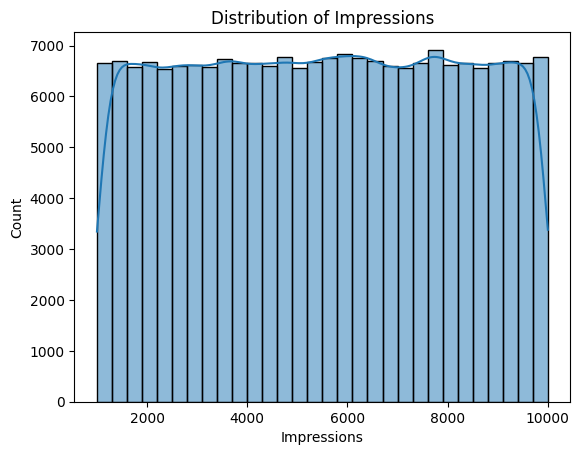

In [21]:
# Distribution of Impressions
sns.histplot(df['Impressions'], bins=30, kde=True)
plt.title('Distribution of Impressions')
plt.show()

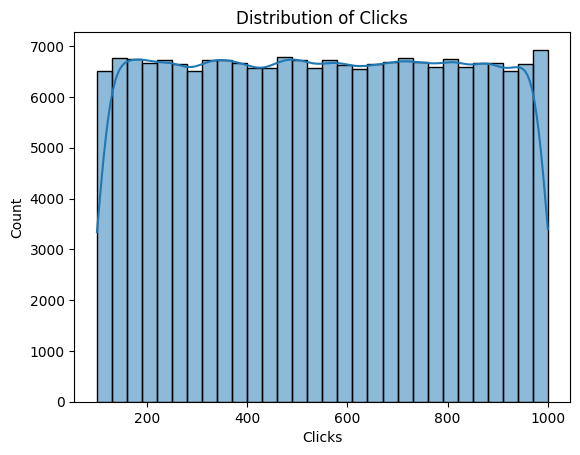

In [22]:
# Distribution of Clicks
sns.histplot(df['Clicks'], bins=30, kde=True)
plt.title('Distribution of Clicks')
plt.show()

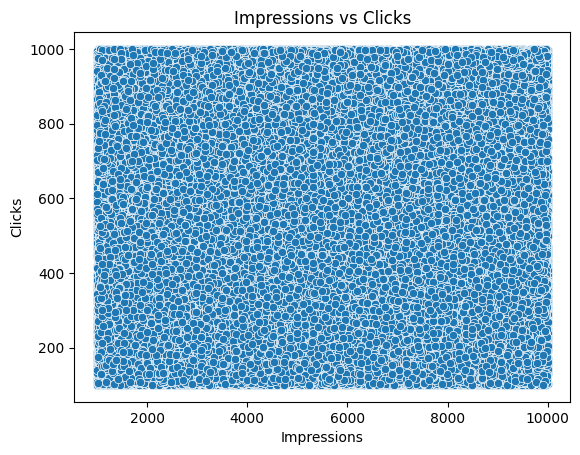

In [23]:
# Relationship between Impressions and Clicks
sns.scatterplot(x='Impressions', y='Clicks', data=df)
plt.title('Impressions vs Clicks')
plt.show()

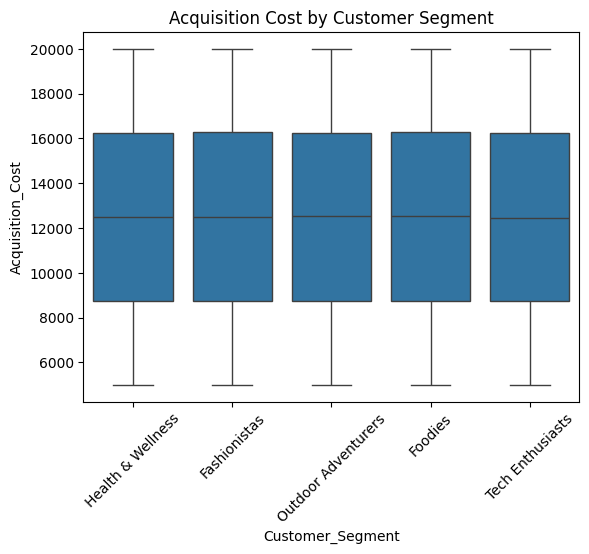

In [24]:
# Boxplot of Acquisition Cost by Customer Segment
sns.boxplot(x='Customer_Segment', y='Acquisition_Cost', data=df)
plt.title('Acquisition Cost by Customer Segment')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Summary statistics for key variables
df[key_variables].describe()

,Impressions,Clicks,Acquisition_Cost
count,200005.000000,200005.000000,200005.000000
mean,5507.307107,549.774591,12504.441794
std,2596.863794,260.019354,4337.663210
min,1000.000000,100.000000,5000.000000
25%,3266.000000,325.000000,8740.000000
50%,5518.000000,550.000000,12497.000000
75%,7753.000000,775.000000,16264.000000
max,10000.000000,1000.000000,20000.000000


# **SQL Query Writing**

### **Calculate Total Impressions for Each Campaign**
Expected Output: A table with campaign_id and total_impressions.

In [ ]:
# Calculate total impressions for each campaign
total_impressions = df.groupby('Campaign_ID')['Impressions'].sum().reset_index()
total_impressions.columns = ['Campaign_ID', 'Total_Impressions']
print(total_impressions)

        Campaign_ID  Total_Impressions
0                 1               1922
1                 2               7523
2                 3               7698
3                 4               1820
4                 5               4201
...             ...                ...
200000       200001               5988
200001       200002               3068
200002       200003               9548
200003       200004               2763
200004       200005               7287

[200005 rows x 2 columns]


## Identify the Campaign with the Highest ROI

In [ ]:
# Identify the campaign with the highest ROI
highest_roi_campaign = df.loc[df['ROI'].idxmax(), ['Campaign_ID', 'Company', 'ROI']]
print(highest_roi_campaign)

Campaign_ID               168
Company        NexGen Systems
ROI                       8.0
Name: 167, dtype: object


### **Find the Top 3 Locations with the Most Impressions**
Expected Output: A table with location and total_impressions

In [ ]:
# Find the top 3 locations with the most impressions
top_locations = df.groupby('Location')['Impressions'].sum().nlargest(3).reset_index()
top_locations.columns = ['Location', 'Total_Impressions']
print(top_locations)

   Location  Total_Impressions
0  New York          221359756
1     Miami          221347726
2   Chicago          219999352


### **Calculate Average Engagement Score by Target Audience**
Expected Output: A table with target_audience and average_engagement_score.

In [ ]:
# Calculate average engagement score by target audience
avg_engagement = df.groupby('Target_Audience')['Engagement_Score'].mean().reset_index()
avg_engagement.columns = ['Target_Audience', 'Average_Engagement_Score']
print(avg_engagement)

  Target_Audience  Average_Engagement_Score
0        All Ages                  5.486869
1       Men 18-24                  5.515015
2       Men 25-34                  5.491980
3     Women 25-34                  5.492740
4     Women 35-44                  5.486570


## **Calculate the Overall CTR (Click-Through Rate)**
Expected Output: A single value for the overall CTR.

In [ ]:
# Calculate the overall CTR
overall_ctr = (df['Clicks'].sum() / df['Impressions'].sum()) * 100
print(f"Overall CTR: {overall_ctr:.2f}%")

Overall CTR: 9.98%


## **Find the Most Cost-Effective Campaign**
Expected Output: A table with campaign_id, company, and cost_per_conversion.

In [ ]:
# Calculate cost per conversion for each campaign
df['Cost_Per_Conversion'] = df['Acquisition_Cost'] / df['Conversion_Rate']

# Find the most cost-effective campaign
most_cost_effective = df.loc[df['Cost_Per_Conversion'].idxmin(), ['Campaign_ID', 'Company', 'Cost_Per_Conversion']]
print(most_cost_effective)

Campaign_ID                       101103
Company                Alpha Innovations
Cost_Per_Conversion         33346.666667
Name: 101102, dtype: object


### **Find Campaigns with CTR Above a Threshold**
Expected Output: A table with campaign_id, company, and ctr.

In [ ]:
# Define a threshold for CTR
ctr_threshold = 0.05  # Example threshold

# Calculate CTR for each campaign
df['CTR'] = (df['Clicks'] / df['Impressions'])

# Find campaigns with CTR above the threshold
high_ctr_campaigns = df[df['CTR'] > ctr_threshold][['Campaign_ID', 'Company', 'CTR']]
print(high_ctr_campaigns)

        Campaign_ID              Company       CTR
0                 1  Innovate Industries  0.263267
2                 3    Alpha Innovations  0.075864
3                 4   DataTech Solutions  0.119231
4                 5       NexGen Systems  0.090217
5                 6   DataTech Solutions  0.060864
...             ...                  ...       ...
200000       200001             TechCorp  0.143287
200001       200002   DataTech Solutions  0.074316
200002       200003   DataTech Solutions  0.075723
200003       200004  Innovate Industries  0.191097
200004       200005  Innovate Industries  0.126801

[160332 rows x 3 columns]


### **Rank Channels by Total Conversions**
Expected Output: A table with channel_used and total_conversions.

In [ ]:
# Calculate total conversions for each channel
total_conversions = df.groupby('Channel_Used')['Conversion_Rate'].sum().reset_index()
total_conversions.columns = ['Channel_Used', 'Total_Conversions']
print(total_conversions)

  Channel_Used  Total_Conversions
0        Email            2697.38
1     Facebook            2625.27
2   Google Ads            2681.24
3    Instagram            2667.57
4      Website            2674.95
5      YouTube            2667.76


In [41]:
import sqlite3

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the DataFrame into a SQL table
df.to_sql('marketing_data', conn, index=False, if_exists='replace')

200005

# Retrieve the top 5 campaigns with the highest ROI:

In [53]:
query = """
SELECT *
FROM marketing_data
ORDER BY ROI DESC
LIMIT 5;
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,168,NexGen Systems,Display,All Ages,30 days,Website,0.12,11879,8.0,New York,17/06/2021,568,4997,6,Outdoor Adventurers
1,220,Innovate Industries,Influencer,All Ages,15 days,Email,0.03,10536,8.0,New York,2021-08-08 00:00:00,924,3584,10,Fashionistas
2,3056,NexGen Systems,Search,Men 25-34,15 days,Email,0.11,15130,8.0,Los Angeles,16/05/2021,606,6638,9,Tech Enthusiasts
3,3232,Alpha Innovations,Display,Women 25-34,30 days,Instagram,0.01,12759,8.0,New York,2021-08-11 00:00:00,476,3627,6,Tech Enthusiasts
4,5348,TechCorp,Social Media,Women 25-34,45 days,Email,0.06,13904,8.0,New York,26/08/2021,420,8201,2,Outdoor Adventurers


## Calculate the total acquisition cost by customer segment

In [54]:
query = """
SELECT Customer_Segment, SUM(Acquisition_Cost) AS Total_Acquisition_Cost
FROM marketing_data
GROUP BY Customer_Segment;
"""
pd.read_sql_query(query, conn)

,Customer_Segment,Total_Acquisition_Cost
0,Fashionistas,496911934
1,Foodies,503614110
2,Health & Wellness,498776239
3,Outdoor Adventurers,500502742
4,Tech Enthusiasts,501145856


## Find campaigns with a high engagement score

In [55]:
query = """
SELECT *
FROM marketing_data
WHERE Engagement_Score >= 8 AND Conversion_Rate > 0.1;
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,11067,2.86,Los Angeles,2021-07-01 00:00:00,817,8749,10,Tech Enthusiasts
1,11,NexGen Systems,Display,Men 25-34,45 days,Email,0.12,8590,3.49,New York,2021-11-01 00:00:00,321,6628,10,Tech Enthusiasts
2,18,Alpha Innovations,Influencer,Men 18-24,15 days,Instagram,0.14,9485,4.48,Miami,18/01/2021,218,9264,9,Health & Wellness
3,39,Innovate Industries,Search,Men 25-34,30 days,Instagram,0.11,14742,2.21,Chicago,2021-08-02 00:00:00,663,9473,10,Tech Enthusiasts
4,50,TechCorp,Social Media,Women 25-34,45 days,Email,0.11,7521,3.98,Los Angeles,19/02/2021,150,7377,8,Tech Enthusiasts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19256,199934,TechCorp,Email,Men 25-34,60 days,Instagram,0.14,9970,6.29,Houston,2021-06-10 00:00:00,161,9072,9,Fashionistas
19257,199943,Alpha Innovations,Display,Women 25-34,15 days,YouTube,0.11,7633,5.30,Houston,15/10/2021,184,4444,10,Foodies
19258,199961,TechCorp,Search,Women 35-44,45 days,Google Ads,0.14,11491,4.52,Chicago,2021-02-11 00:00:00,732,5029,9,Outdoor Adventurers
19259,199974,Alpha Innovations,Social Media,Women 35-44,45 days,YouTube,0.12,11595,6.75,New York,2021-10-11 00:00:00,724,5313,10,Tech Enthusiasts


## Identify High-Performing **Campaigns**

In [56]:
query = """
SELECT Campaign_ID, Company, Campaign_Type, ROI, Conversion_Rate, Engagement_Score
FROM marketing_data
WHERE ROI > 5 AND Conversion_Rate > 0.1
ORDER BY ROI DESC;
"""
pd.read_sql_query(query, conn)

,Campaign_ID,Company,Campaign_Type,ROI,Conversion_Rate,Engagement_Score
0,168,NexGen Systems,Display,8.00,0.12,6
1,3056,NexGen Systems,Search,8.00,0.11,9
2,5930,Innovate Industries,Influencer,8.00,0.15,7
3,18915,Alpha Innovations,Email,8.00,0.14,5
4,29550,NexGen Systems,Display,8.00,0.14,4
...,...,...,...,...,...,...
32036,190013,Innovate Industries,Search,5.01,0.11,9
32037,198800,DataTech Solutions,Display,5.01,0.11,2
32038,198982,DataTech Solutions,Search,5.01,0.12,5
32039,199157,NexGen Systems,Influencer,5.01,0.11,2


## Optimize Budget Allocation

In [57]:
query = """
SELECT Channel_Used, AVG(Acquisition_Cost) AS Avg_Acquisition_Cost, AVG(ROI) AS Avg_ROI
FROM marketing_data
GROUP BY Channel_Used;
"""
pd.read_sql_query(query, conn)

,Channel_Used,Avg_Acquisition_Cost,Avg_ROI
0,Email,12526.387809,4.996487
1,Facebook,12510.768617,5.018672
2,Google Ads,12528.245036,5.003126
3,Instagram,12491.760002,4.988706
4,Website,12487.842001,5.014114
5,YouTube,12481.570688,4.993720


# Target Audience Insights:

In [63]:
query = """
SELECT Target_Audience, AVG(Engagement_Score) AS Avg_Engagement, AVG(Conversion_Rate) AS Avg_Conversion_Rate
FROM marketing_data
GROUP BY Target_Audience;
"""
pd.read_sql_query(query, conn)

,Target_Audience,Avg_Engagement,Avg_Conversion_Rate
0,All Ages,5.486869,0.079975
1,Men 18-24,5.515015,0.080239
2,Men 25-34,5.491980,0.080130
3,Women 25-34,5.492740,0.079899
4,Women 35-44,5.486570,0.080100


In [64]:
result = pd.read_sql_query(query, conn)
result.to_csv('high_performing_campaigns.csv', index=False)

# DOCUMENTING RESULT

In [84]:
# Save the SQL-like queries as Python code snippets
queries = """
# Query 1: Calculate Total Impressions for Each Campaign
total_impressions = df.groupby('Campaign_ID')['Impressions'].sum().reset_index()
total_impressions.columns = ['Campaign_ID', 'Total_Impressions']

# Query 2: Identify the Campaign with the Highest ROI
highest_roi_campaign = df.loc[df['ROI'].idxmax(), ['Campaign_ID', 'Company', 'ROI']]

# Query 3: Find the Top 3 Locations with the Most Impressions
top_locations = df.groupby('Location')['Impressions'].sum().nlargest(3).reset_index()
top_locations.columns = ['Location', 'Total_Impressions']

# Query 4: Calculate Average Engagement Score by Target Audience
avg_engagement = df.groupby('Target_Audience')['Engagement_Score'].mean().reset_index()
avg_engagement.columns = ['Target_Audience', 'Average_Engagement_Score']

# Query 5: Calculate the Overall CTR (Click-Through Rate)
overall_ctr = (df['Clicks'].sum() / df['Impressions'].sum()) * 100

# Query 6: Find the Most Cost-Effective Campaign
df['Cost_Per_Conversion'] = df['Acquisition_Cost'] / df['Conversion_Rate']
most_cost_effective = df.loc[df['Cost_Per_Conversion'].idxmin(), ['Campaign_ID', 'Company', 'Cost_Per_Conversion']]

# Query 7: Find Campaigns with CTR Above a Threshold
ctr_threshold = 0.05  # Example threshold
df['CTR'] = (df['Clicks'] / df['Impressions'])
high_ctr_campaigns = df[df['CTR'] > ctr_threshold][['Campaign_ID', 'Company', 'CTR']]

# Query 8: Rank Channels by Total Conversions
total_conversions = df.groupby('Channel_Used')['Conversion_Rate'].sum().reset_index()
total_conversions.columns = ['Channel_Used', 'Total_Conversions']
"""

# Save the queries to a text file
with open('sql_queries.txt', 'w') as file:
    file.write(queries)

# **QUERY 1**

In [88]:
# Run Query 1
total_impressions = df.groupby('Campaign_ID')['Impressions'].sum().reset_index()
total_impressions.columns = ['Campaign_ID', 'Total_Impressions']
print(total_impressions)

        Campaign_ID  Total_Impressions
0                 1               1922
1                 2               7523
2                 3               7698
3                 4               1820
4                 5               4201
...             ...                ...
200000       200001               5988
200001       200002               3068
200002       200003               9548
200003       200004               2763
200004       200005               7287

[200005 rows x 2 columns]


# QUERY 2

In [95]:
# Query 2
highest_roi_campaign = df.loc[df['ROI'].idxmax(), ['Campaign_ID', 'Company', 'ROI']]
print(highest_roi_campaign)

Campaign_ID               168
Company        NexGen Systems
ROI                       8.0
Name: 167, dtype: object


# QUERY 3

In [103]:
# Query 3
print(top_locations)
top_locations = df.groupby('Location')['Impressions'].sum().nlargest(3).reset_index()
top_locations.columns = ['Location', 'Total_Impressions']

   Location  Total_Impressions
0  New York          221359756
1     Miami          221347726
2   Chicago          219999352


# QUERY 4

In [102]:
# Query 4
print(avg_engagement)

  Target_Audience  Average_Engagement_Score
0        All Ages                  5.486869
1       Men 18-24                  5.515015
2       Men 25-34                  5.491980
3     Women 25-34                  5.492740
4     Women 35-44                  5.486570


# QUERY 5

In [105]:
# Query 5
overall_ctr = (df['Clicks'].sum() / df['Impressions'].sum()) * 100
print(f"Overall CTR: {overall_ctr:.2f}%")

Overall CTR: 9.98%


# QUERY 6

In [117]:
# Query 6
# Calculate cost per conversion for each campaign
df['Cost_Per_Conversion'] = df.apply(
    lambda row: row['Acquisition_Cost'] / row['Conversion_Rate'] if row['Conversion_Rate'] != 0 else float('inf'),
    axis=1
)

# Find the most cost-effective campaign
most_cost_effective = df.loc[df['Cost_Per_Conversion'].idxmin(), ['Campaign_ID', 'Company', 'Cost_Per_Conversion']]
print("Most Cost-Effective Campaign:")
print(most_cost_effective)

Most Cost-Effective Campaign:
Campaign_ID                       101103
Company                Alpha Innovations
Cost_Per_Conversion         33346.666667
Name: 101102, dtype: object


# QUERY 7

In [119]:
# Query 7: Find Campaigns with CTR Above a Threshold
# Define a threshold for CTR
ctr_threshold = 0.05  # Example threshold (5%)

# Calculate CTR for each campaign
df['CTR'] = df.apply(
    lambda row: row['Clicks'] / row['Impressions'] if row['Impressions'] != 0 else 0,
    axis=1
)

# Find campaigns with CTR above the threshold
high_ctr_campaigns = df[df['CTR'] > ctr_threshold][['Campaign_ID', 'Company', 'CTR']]
print("Campaigns with CTR Above Threshold:")
print(high_ctr_campaigns)

Campaigns with CTR Above Threshold:
        Campaign_ID              Company       CTR
0                 1  Innovate Industries  0.263267
2                 3    Alpha Innovations  0.075864
3                 4   DataTech Solutions  0.119231
4                 5       NexGen Systems  0.090217
5                 6   DataTech Solutions  0.060864
...             ...                  ...       ...
200000       200001             TechCorp  0.143287
200001       200002   DataTech Solutions  0.074316
200002       200003   DataTech Solutions  0.075723
200003       200004  Innovate Industries  0.191097
200004       200005  Innovate Industries  0.126801

[160332 rows x 3 columns]


# QUERY 8

In [120]:
# Query 8: Rank Channels by Total Conversions
# Calculate total conversions for each channel
df['Total_Conversions'] = df['Conversion_Rate'] * df['Impressions']  # If Conversion_Rate is a rate
total_conversions = df.groupby('Channel_Used')['Total_Conversions'].sum().reset_index()
total_conversions.columns = ['Channel_Used', 'Total_Conversions']

# Sort by total conversions in descending order
total_conversions = total_conversions.sort_values(by='Total_Conversions', ascending=False)
print("Rank Channels by Total Conversions:")
print(total_conversions)

Rank Channels by Total Conversions:
  Channel_Used  Total_Conversions
2   Google Ads        14804993.60
0        Email        14796855.85
4      Website        14762165.57
5      YouTube        14661901.97
3    Instagram        14657395.58
1     Facebook        14451723.86


In [126]:
from google.colab import files

# Download the file
files.download('sql_queries.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>